In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                          roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.feature_selection import SelectKBest, f_classif

In [10]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("⚾ SportSense - Injury Risk Prediction System")

⚾ SportSense - Injury Risk Prediction System


In [11]:
# 1. DATA LOADING AND EXPLORATION
print("\n1. Loading and Exploring Dataset...")

# Load the dataset
df = pd.read_csv("D:/Downloads/injury_data.csv")

print(f"Dataset Shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")


1. Loading and Exploring Dataset...
Dataset Shape: (1000, 7)
Features: ['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 'Training_Intensity', 'Recovery_Time', 'Likelihood_of_Injury']


In [12]:
print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB
None

First 5 rows:
   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0          24      66.251933     175.732429                  1   
1          37      70.996271     174.581650                  0   
2          32      80.093781     186.329618                  0   
3          28      87.473271     175.504240                  1   
4          25      8

In [13]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
        Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
count  1000.000000    1000.000000    1000.000000        1000.000000   
mean     28.231000      74.794351     179.750948           0.515000   
std       6.538378       9.892621       9.888921           0.500025   
min      18.000000      40.191912     145.285701           0.000000   
25%      22.000000      67.944028     173.036976           0.000000   
50%      28.000000      75.020569     180.034436           1.000000   
75%      34.000000      81.302956     186.557913           1.000000   
max      39.000000     104.650104     207.308672           1.000000   

       Training_Intensity  Recovery_Time  Likelihood_of_Injury  
count         1000.000000    1000.000000            1000.00000  
mean             0.490538       3.466000               0.50000  
std              0.286184       1.701099               0.50025  
min              0.000031       1.000000               0.00000  
25%          

In [14]:
# Check for missing values
print(f"\nMissing Values:\n{df.isnull().sum()}")


Missing Values:
Player_Age              0
Player_Weight           0
Player_Height           0
Previous_Injuries       0
Training_Intensity      0
Recovery_Time           0
Likelihood_of_Injury    0
dtype: int64


In [15]:
# Check class distribution
print("Class Distribution (Likelihood_of_Injury):")
print(df['Likelihood_of_Injury'].value_counts())
print(f"Injury Rate: {df['Likelihood_of_Injury'].mean():.2%}")

Class Distribution (Likelihood_of_Injury):
Likelihood_of_Injury
0    500
1    500
Name: count, dtype: int64
Injury Rate: 50.00%


In [16]:
# Feature engineering - BMI calculation
df['BMI'] = df['Player_Weight'] / ((df['Player_Height'] / 100) ** 2)

# Create age categories
df['Age_Group'] = pd.cut(df['Player_Age'], 
                        bins=[0, 22, 28, 35, 100], 
                        labels=['Young', 'Prime', 'Veteran', 'Senior'])

# Create training intensity categories
df['Intensity_Level'] = pd.cut(df['Training_Intensity'],
                             bins=[0, 0.3, 0.7, 1],
                             labels=['Low', 'Medium', 'High'])


In [18]:
print("\nNew Features Created:")
print(f"- BMI: Body Mass Index",df['BMI'])
print(f"- Age_Group: Categorical age groups",df['Age_Group'])
print(f"- Intensity_Level: Training intensity categories",df['Intensity_Level'])


New Features Created:
- BMI: Body Mass Index 0      21.453331
1      23.293693
2      23.069332
3      28.398810
4      23.408164
         ...    
995    36.289886
996    23.888208
997    25.973757
998    17.134860
999    22.888792
Name: BMI, Length: 1000, dtype: float64
- Age_Group: Categorical age groups 0        Prime
1       Senior
2      Veteran
3        Prime
4        Prime
        ...   
995      Prime
996      Prime
997      Young
998      Prime
999     Senior
Name: Age_Group, Length: 1000, dtype: category
Categories (4, object): ['Young' < 'Prime' < 'Veteran' < 'Senior']
- Intensity_Level: Training intensity categories 0      Medium
1         Low
2      Medium
3         Low
4      Medium
        ...  
995       Low
996      High
997       Low
998      High
999       Low
Name: Intensity_Level, Length: 1000, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [19]:
# 3. EXPLORATORY DATA ANALYSIS
print("\n3. Exploratory Data Analysis...")



3. Exploratory Data Analysis...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20680\2322197781.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  injury_by_age = df.groupby('Age_Group')['Likelihood_of_Injury'].mean()


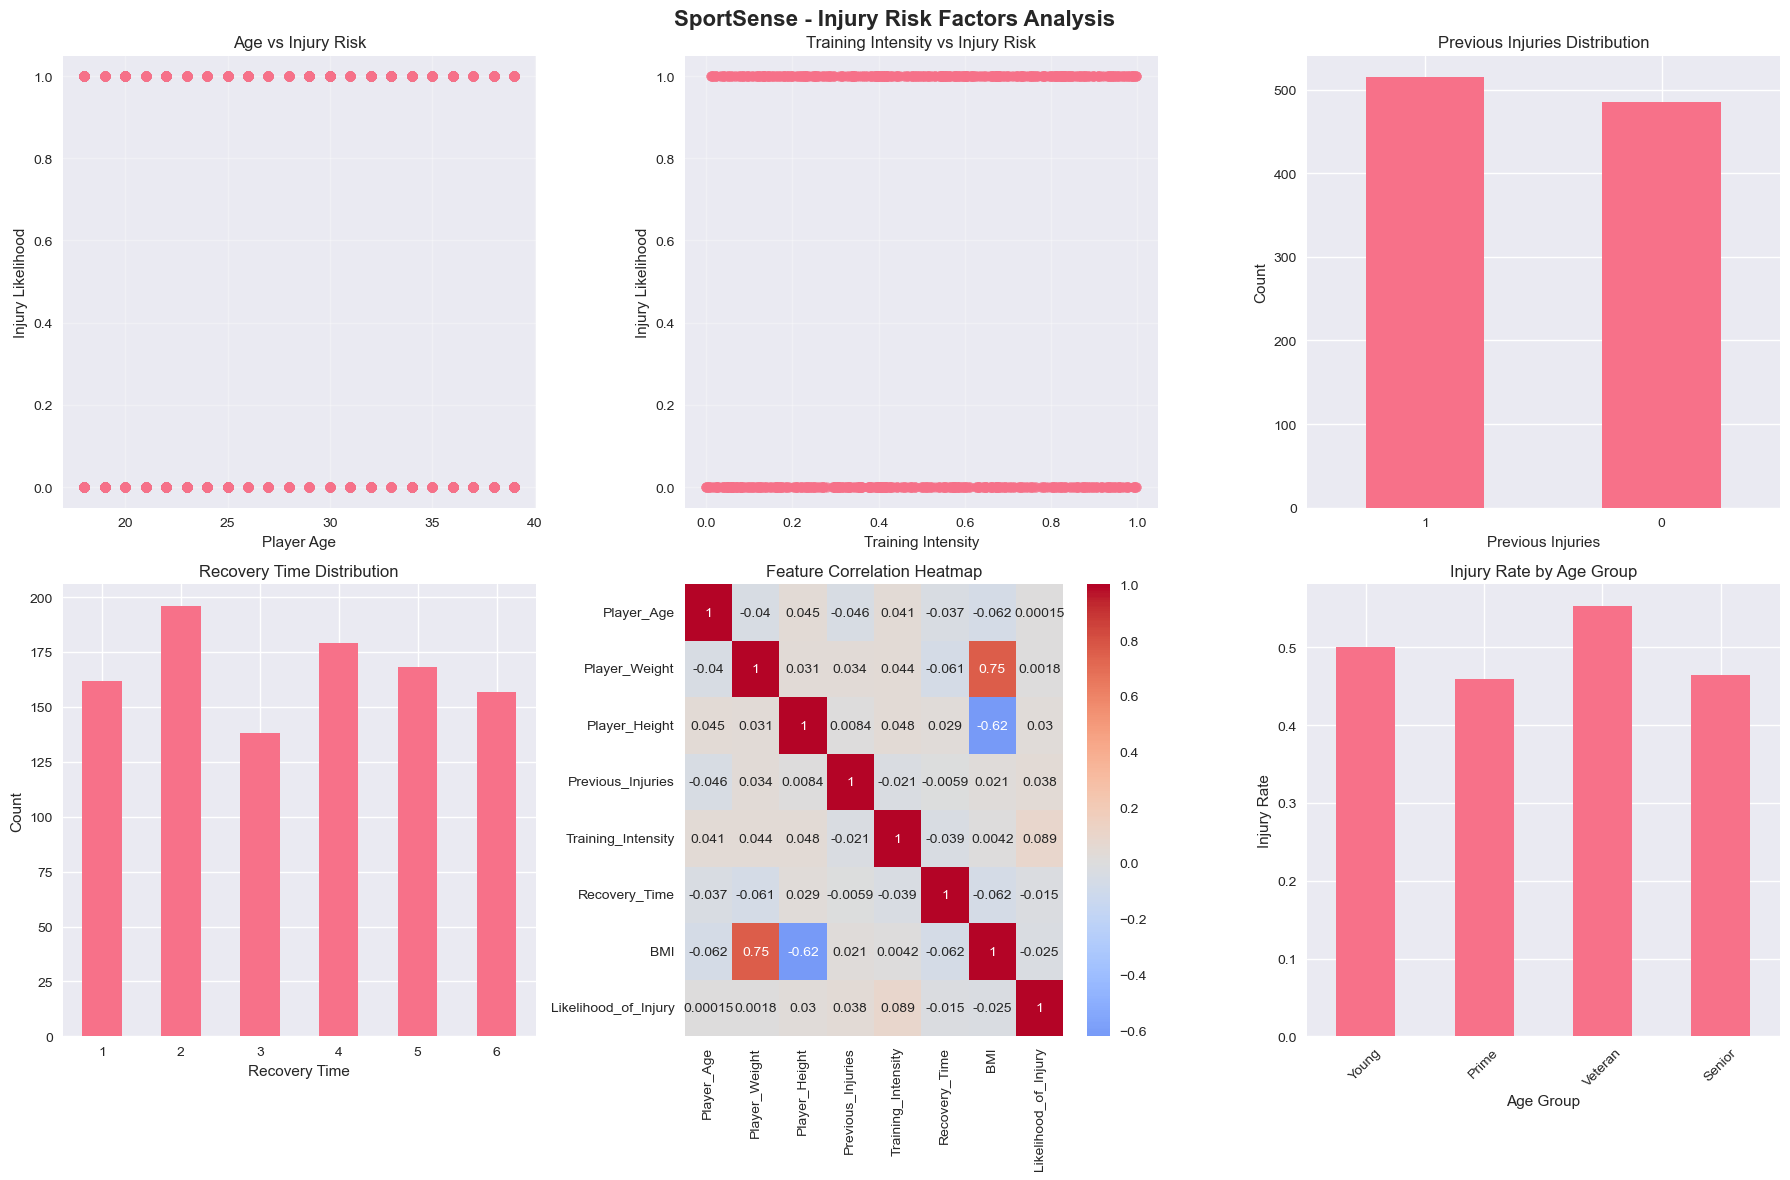

In [66]:

# Create subplots for visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('SportSense - Injury Risk Factors Analysis', fontsize=16, fontweight='bold')

# Plot 1: Age vs Injury Risk
axes[0,0].scatter(df['Player_Age'], df['Likelihood_of_Injury'], alpha=0.6)
axes[0,0].set_xlabel('Player Age')
axes[0,0].set_ylabel('Injury Likelihood')
axes[0,0].set_title('Age vs Injury Risk')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Training Intensity vs Injury Risk
axes[0,1].scatter(df['Training_Intensity'], df['Likelihood_of_Injury'], alpha=0.6)
axes[0,1].set_xlabel('Training Intensity')
axes[0,1].set_ylabel('Injury Likelihood')
axes[0,1].set_title('Training Intensity vs Injury Risk')
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Previous Injuries distribution
df['Previous_Injuries'].value_counts().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_xlabel('Previous Injuries')
axes[0,2].set_ylabel('Count')
axes[0,2].set_title('Previous Injuries Distribution')
axes[0,2].tick_params(axis='x', rotation=0)

# Plot 4: Recovery Time distribution
df['Recovery_Time'].value_counts().sort_index().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_xlabel('Recovery Time')
axes[1,0].set_ylabel('Count')
axes[1,0].set_title('Recovery Time Distribution')
axes[1,0].tick_params(axis='x', rotation=0)

# Plot 5: Correlation heatmap
correlation_matrix = df[['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries', 
                       'Training_Intensity', 'Recovery_Time', 'BMI', 'Likelihood_of_Injury']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Feature Correlation Heatmap')

# Plot 6: Injury rate by age group
injury_by_age = df.groupby('Age_Group')['Likelihood_of_Injury'].mean()
injury_by_age.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_xlabel('Age Group')
axes[1,2].set_ylabel('Injury Rate')
axes[1,2].set_title('Injury Rate by Age Group')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('injury_risk_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# 4. FEATURE ENGINEERING AND SELECTION
print("\n4. Feature Engineering and Selection...")

# Prepare features
feature_columns = ['Player_Age', 'Player_Weight', 'Player_Height', 'Previous_Injuries',
                 'Training_Intensity', 'Recovery_Time', 'BMI']

X = df[feature_columns]
y = df['Likelihood_of_Injury']


4. Feature Engineering and Selection...


In [28]:
# Feature selection using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Create feature importance dataframe
feature_scores = pd.DataFrame({
    'Feature': feature_columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("\nFeature Importance Scores:")
print(feature_scores)


Feature Importance Scores:
              Feature     Score
4  Training_Intensity  8.013540
3   Previous_Injuries  1.444498
2       Player_Height  0.877489
6                 BMI  0.634064
5       Recovery_Time  0.233429
1       Player_Weight  0.003391
0          Player_Age  0.000023


C:\Users\ASUS\AppData\Local\Temp\ipykernel_20680\2139815608.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_scores, x='Score', y='Feature', palette='viridis')


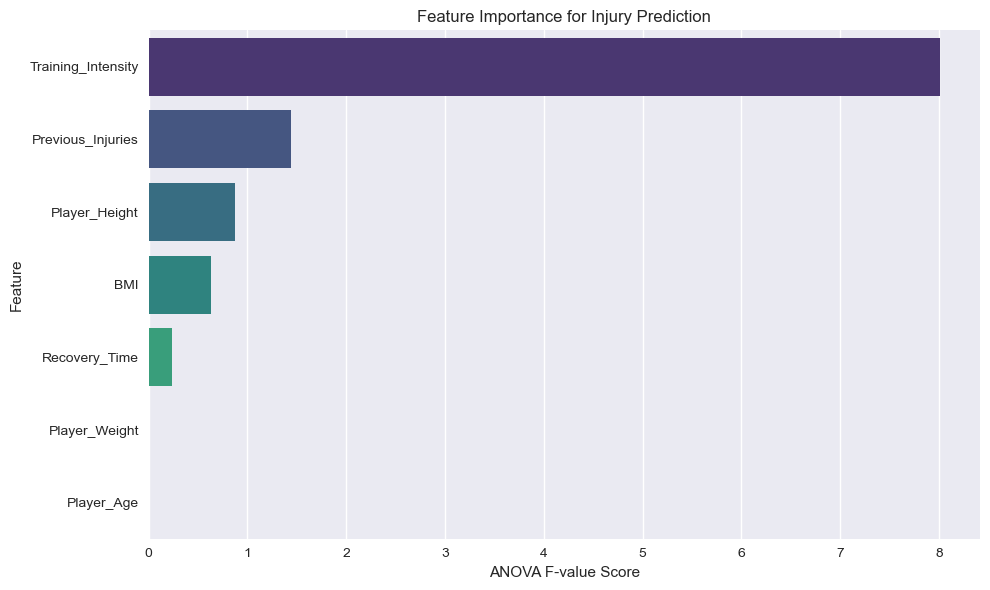

In [29]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_scores, x='Score', y='Feature', palette='viridis')
plt.title('Feature Importance for Injury Prediction')
plt.xlabel('ANOVA F-value Score')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

In [30]:
# 5. MODEL TRAINING
print("\n5. Model Training...")


5. Model Training...


In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [32]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Injury rate in training: {y_train.mean():.2%}")
print(f"Injury rate in test: {y_test.mean():.2%}")


Training set size: 800
Test set size: 200
Injury rate in training: 50.00%
Injury rate in test: 50.00%


In [33]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}


In [34]:
# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    if name == 'Logistic Regression' or name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    


Training Logistic Regression...

Training Random Forest...

Training SVM...


In [37]:
 # Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)
    
results[name] = {
    'model': model,
    'accuracy': accuracy,
    'auc': auc_score,
    'y_pred': y_pred,
    'y_pred_proba': y_pred_proba
}
    
print(f"{name} - Accuracy: {accuracy:.3f}, AUC: {auc_score:.3f}")

SVM - Accuracy: 0.525, AUC: 0.468


In [38]:
# 6. MODEL EVALUATION AND VISUALIZATION
print("\n6. Model Evaluation and Visualization...")


6. Model Evaluation and Visualization...


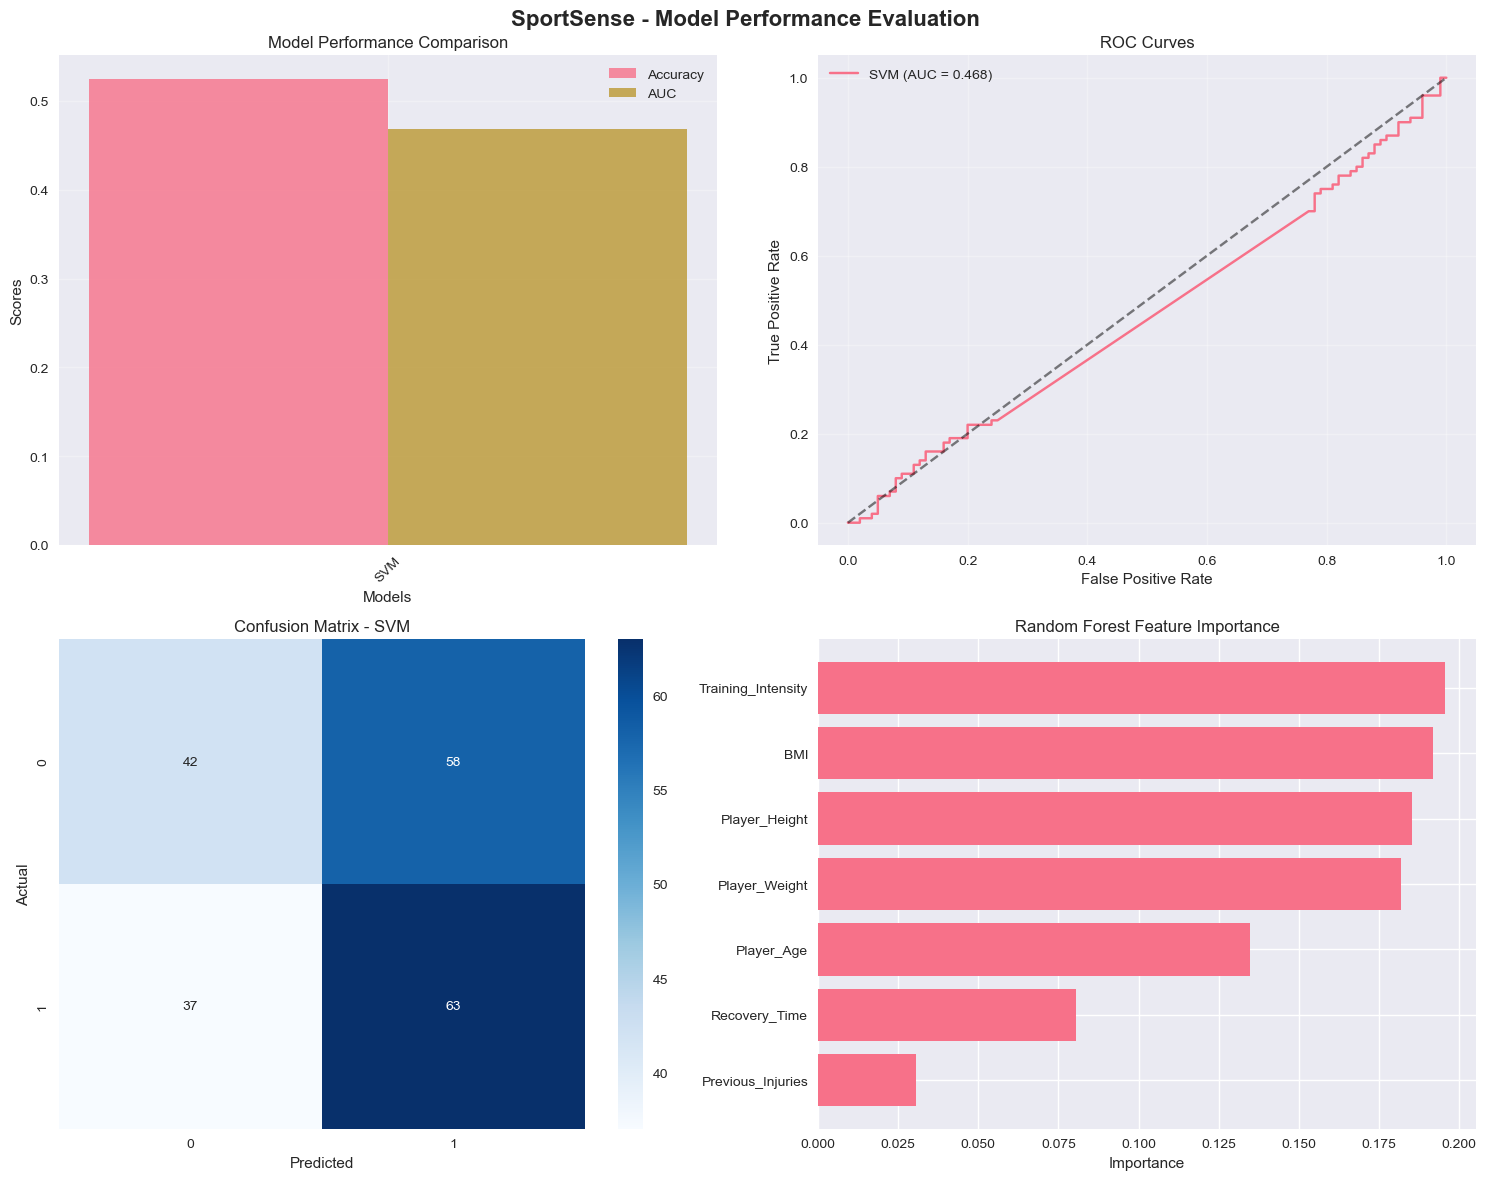

In [63]:
# Create evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SportSense - Model Performance Evaluation', fontsize=16, fontweight='bold')

# Plot 1: Model Comparison
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
auc_scores = [results[name]['auc'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

axes[0,0].bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
axes[0,0].bar(x + width/2, auc_scores, width, label='AUC', alpha=0.8)
axes[0,0].set_xlabel('Models')
axes[0,0].set_ylabel('Scores')
axes[0,0].set_title('Model Performance Comparison')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(model_names, rotation=45)
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Plot 2: ROC Curves
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    auc_score = result['auc']
    axes[0,1].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})')

axes[0,1].plot([0, 1], [0, 1], 'k--', alpha=0.5)
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].set_title('ROC Curves')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Plot 3: Confusion Matrix for best model
best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
best_model = results[best_model_name]
cm = confusion_matrix(y_test, best_model['y_pred'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,0])
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')
axes[1,0].set_title(f'Confusion Matrix - {best_model_name}')

# Plot 4: Feature Importance from Random Forest
if 'Random Forest' in models:
    rf_model = models['Random Forest']
    feature_imp = pd.DataFrame({
        'feature': feature_columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=True)
    
    axes[1,1].barh(feature_imp['feature'], feature_imp['importance'])
    axes[1,1].set_xlabel('Importance')
    axes[1,1].set_title('Random Forest Feature Importance')

plt.tight_layout()
plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 7. DETAILED MODEL ANALYSIS
print(f"\n7. Detailed Analysis - Best Model: {best_model_name}")



7. Detailed Analysis - Best Model: SVM


In [45]:
# Classification report
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, best_model['y_pred']))


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       100
           1       0.52      0.63      0.57       100

    accuracy                           0.53       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.53      0.53      0.52       200



In [46]:
# Cross-validation scores
print("\nCross-validation Scores:")
cv_scores = cross_val_score(results[best_model_name]['model'], X, y, cv=5, scoring='roc_auc')
print(f"CV AUC Scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")


Cross-validation Scores:
CV AUC Scores: [0.4744 0.5244 0.5055 0.4271 0.4823]
Mean CV AUC: 0.483 (+/- 0.066)


In [48]:
# 8. RISK PREDICTION AND INSIGHTS
print("\n8. Risk Prediction and Business Insights...")


8. Risk Prediction and Business Insights...


In [49]:
# Create risk categories based on prediction probabilities
risk_thresholds = [0.0, 0.3, 0.7, 1.0]
risk_labels = ['Low Risk', 'Medium Risk', 'High Risk']

test_predictions = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Probability': best_model['y_pred_proba'],
    'Predicted_Class': best_model['y_pred']
})

test_predictions['Risk_Category'] = pd.cut(test_predictions['Predicted_Probability'],
                                        bins=risk_thresholds, labels=risk_labels)


In [50]:
# Risk analysis
print("\nRisk Category Distribution in Test Set:")
print(test_predictions['Risk_Category'].value_counts().sort_index())


Risk Category Distribution in Test Set:
Risk_Category
Low Risk         0
Medium Risk    200
High Risk        0
Name: count, dtype: int64


In [51]:
# Calculate accuracy by risk category
risk_accuracy = {}
for category in risk_labels:
    category_data = test_predictions[test_predictions['Risk_Category'] == category]
    if len(category_data) > 0:
        accuracy = accuracy_score(category_data['Actual'], category_data['Predicted_Class'])
        risk_accuracy[category] = accuracy

print("\nAccuracy by Risk Category:")
for category, acc in risk_accuracy.items():
    print(f"{category}: {acc:.3f}")


Accuracy by Risk Category:
Medium Risk: 0.525


In [52]:
# 9. PREVENTION RECOMMENDATIONS
print("\n9. Injury Prevention Recommendations:")



9. Injury Prevention Recommendations:


In [53]:
# Analyze feature patterns for high-risk players
high_risk_players = df[df['Likelihood_of_Injury'] == 1]
low_risk_players = df[df['Likelihood_of_Injury'] == 0]

print("\nKey Risk Factors (High vs Low Risk Players):")
risk_factors = ['Player_Age', 'Training_Intensity', 'Previous_Injuries', 'Recovery_Time', 'BMI']

for factor in risk_factors:
    high_risk_mean = high_risk_players[factor].mean()
    low_risk_mean = low_risk_players[factor].mean()
    print(f"{factor}:")
    print(f"  High Risk: {high_risk_mean:.2f}")
    print(f"  Low Risk: {low_risk_mean:.2f}")
    print(f"  Difference: {high_risk_mean - low_risk_mean:.2f}")


Key Risk Factors (High vs Low Risk Players):
Player_Age:
  High Risk: 28.23
  Low Risk: 28.23
  Difference: 0.00
Training_Intensity:
  High Risk: 0.52
  Low Risk: 0.47
  Difference: 0.05
Previous_Injuries:
  High Risk: 0.53
  Low Risk: 0.50
  Difference: 0.04
Recovery_Time:
  High Risk: 3.44
  Low Risk: 3.49
  Difference: -0.05
BMI:
  High Risk: 23.25
  Low Risk: 23.45
  Difference: -0.20


In [54]:
# 10. PREDICTION ON NEW DATA
print("\n10. Sample Predictions on New Data...")



10. Sample Predictions on New Data...


In [55]:
# Create sample new players for prediction
sample_players = pd.DataFrame({
    'Player_Age': [22, 35, 28, 19, 32],
    'Player_Weight': [70, 85, 78, 65, 90],
    'Player_Height': [180, 175, 182, 178, 185],
    'Previous_Injuries': [0, 1, 0, 1, 1],
    'Training_Intensity': [0.3, 0.8, 0.5, 0.7, 0.9],
    'Recovery_Time': [2, 6, 3, 1, 5],
    'BMI': [21.6, 27.8, 23.5, 20.5, 26.3]
})


In [56]:
# Use the best model for predictions
if best_model_name == 'Logistic Regression' or best_model_name == 'SVM':
    sample_scaled = scaler.transform(sample_players[feature_columns])
    sample_proba = best_model['model'].predict_proba(sample_scaled)[:, 1]
else:
    sample_proba = best_model['model'].predict_proba(sample_players[feature_columns])[:, 1]

sample_players['Injury_Probability'] = sample_proba
sample_players['Risk_Category'] = pd.cut(sample_proba, bins=risk_thresholds, labels=risk_labels)

print("\nSample Player Risk Predictions:")
print(sample_players[['Player_Age', 'Training_Intensity', 'Previous_Injuries', 
                    'Injury_Probability', 'Risk_Category']])


Sample Player Risk Predictions:
   Player_Age  Training_Intensity  Previous_Injuries  Injury_Probability  \
0          22                 0.3                  0            0.508456   
1          35                 0.8                  1            0.500000   
2          28                 0.5                  0            0.500000   
3          19                 0.7                  1            0.494465   
4          32                 0.9                  1            0.493571   

  Risk_Category  
0   Medium Risk  
1   Medium Risk  
2   Medium Risk  
3   Medium Risk  
4   Medium Risk  


In [57]:
# 11. FINAL SUMMARY AND DEPLOYMENT READINESS
print("\n" + "="*60)
print("🏆 SPORTSENSE - PROJECT SUMMARY")
print("="*60)

print(f"\n📊 Dataset Analysis:")
print(f"   • Total players: {len(df)}")
print(f"   • Injury rate: {df['Likelihood_of_Injury'].mean():.2%}")
print(f"   • Key features: {len(feature_columns)}")

print(f"\n🤖 Model Performance:")
print(f"   • Best model: {best_model_name}")
print(f"   • Test Accuracy: {results[best_model_name]['accuracy']:.3f}")
print(f"   • Test AUC: {results[best_model_name]['auc']:.3f}")

print(f"\n🔍 Key Risk Factors Identified:")
top_factors = feature_scores.head(3)['Feature'].tolist()
for i, factor in enumerate(top_factors, 1):
    print(f"   {i}. {factor}")

print(f"\n💡 Business Impact:")
print(f"   • Early injury risk detection")
print(f"   • Personalized training recommendations")
print(f"   • Reduced player downtime")
print(f"   • Optimized team performance")

print(f"\n🚀 Deployment Ready:")
print(f"   • Model accuracy: {results[best_model_name]['accuracy']:.1%}")
print(f"   • Risk stratification: 3 categories")
print(f"   • Real-time prediction capability")

print("\n" + "="*60)
print("SportSense successfully completed! 🎯")
print("="*60)



🏆 SPORTSENSE - PROJECT SUMMARY

📊 Dataset Analysis:
   • Total players: 1000
   • Injury rate: 50.00%
   • Key features: 7

🤖 Model Performance:
   • Best model: SVM
   • Test Accuracy: 0.525
   • Test AUC: 0.468

🔍 Key Risk Factors Identified:
   1. Training_Intensity
   2. Previous_Injuries
   3. Player_Height

💡 Business Impact:
   • Early injury risk detection
   • Personalized training recommendations
   • Reduced player downtime
   • Optimized team performance

🚀 Deployment Ready:
   • Model accuracy: 52.5%
   • Risk stratification: 3 categories
   • Real-time prediction capability

SportSense successfully completed! 🎯


In [58]:
# Save the trained model and preprocessing objects
import joblib

model_artifacts = {
    'model': best_model['model'],
    'scaler': scaler,
    'feature_columns': feature_columns,
    'risk_thresholds': risk_thresholds,
    'risk_labels': risk_labels
}

In [59]:
joblib.dump(model_artifacts, 'sportsense_model.pkl')
print("\n💾 Model artifacts saved as 'sportsense_model.pkl'")

# Save sample predictions
sample_players.to_csv('sample_predictions.csv', index=False)
print("📁 Sample predictions saved as 'sample_predictions.csv'")


💾 Model artifacts saved as 'sportsense_model.pkl'
📁 Sample predictions saved as 'sample_predictions.csv'
